## Building makemore Part 2: MLP
#### https://www.youtube.com/watch?v=TCH_1BHY58I

In [42]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
words = open("data/names.txt", "r").read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [44]:
len(words)

32033

In [45]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i,s in enumerate(chars,1)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [46]:
# Creating training dataset
block_size = 3
X, y = [], []

for name in words:
    window = [0] * block_size
    for n in name + ".":
        n = stoi[n]
        X.append(window)
        y.append(n)
        window = window[1:] + [n]

X = torch.tensor(X)
y = torch.tensor(y)

In [47]:
# Dataset of 228146 examples with three words being fed into the neural network to predict the next single letter
print(X.shape)
print(y.shape)

torch.Size([228146, 3])
torch.Size([228146])


In [48]:
# Look up table containing embeddings for each letter (representing each word a two dimentional vector)
# C = torch.randn((27,2))

In [49]:
# Appling them in the dataset
# emb = C[X]
# print(emb.shape)
# Shape [examples, three_letter, two_dimentional_vector_to_represent_each_letter]

In [50]:
# According to Bengio paper, three word embeddings are concatenated and fed into the neural network
# Use .view() to manipulate the shape of a tensor **most efficient
# emb.view(-1,6).shape

In [63]:
# Defining the two layer neural network
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [64]:
# (1, 90) -> (90, 100) -> (100, 27)
# (1, 90) -> (1, 100)  -> (1, 27)  W

In [56]:
emb = C[X]
h = torch.tanh((emb.view(-1,6) @ W1) + b1)
logits = (h @ W2) + b2
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdims=True)
# loss = -probs[torch.arange(X.shape[0]),y].log().mean()
loss = F.cross_entropy(logits, y)

In [58]:
loss

tensor(19.5052)

In [59]:
# It is more efficient to use F.cross_entropy because
# 1. Pytorch doesn't create intermediate tensor objects like counts, probs and the whole mathematical opration is done more efficiently 
# 2. Backward pass equation is also much simpler when we use F.cross_entropy
# 3. Pytorch makes sure the .exp() function doesn't return nan when the logits explode (by negating the array with max val)
# @33 min

In [65]:
for p in parameters:
    p.requires_grad = True

In [80]:
# Adding mini batch since it it much more efficient in practice
# Taking many steps with approx gradient direction is more efficient than calculating the exact gradient and taking fewer steps

In [89]:
# Training loop
for _ in range(10):

    # Mini Batch
    ix = torch.randint(0, X.shape[0], (32,)) # 32 is batch size
    
    # Forward Pass
    emb = C[X[ix]]
    h = torch.tanh((emb.view(-1,6) @ W1) + b1)
    logits = (h @ W2) + b2
    loss = F.cross_entropy(logits, y[ix])
    print(loss.item())

    # Backward
    for p in parameters:
        p.grad = None
    loss.backward()

    # Update
    for p in parameters:
        p.data += -0.01 * p.grad

2.733107566833496
2.856109380722046
2.8633573055267334
2.3438305854797363
2.4861972332000732
2.717982530593872
2.2867355346679688
2.4353418350219727
2.770944833755493
2.9593067169189453


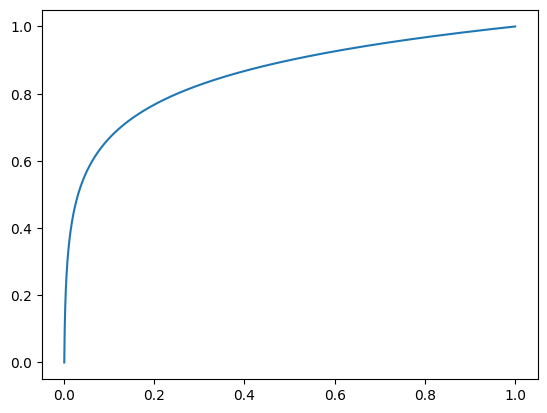

In [93]:
x_ = 10 ** torch.linspace(-3, 0, 1000)
y_ = torch.linspace(0, 1, 1000)
plt.plot(x_, y_)